In [1]:
#데이터 전처리 실습#
#타이타닉 생존자 예측 문제 데이터 전처리#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [4]:
data=pd.read_csv("C:/Users/dinom/data-study/titanic/train.csv")
print(data.shape)
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#기본 샘플
df=data.copy()

In [6]:
#데이터 전처리 종류, 스케일링, 이상치 처리, 데이터 변환

In [8]:
#데이터 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#숫자형 데이터의 기본 통계값 보기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

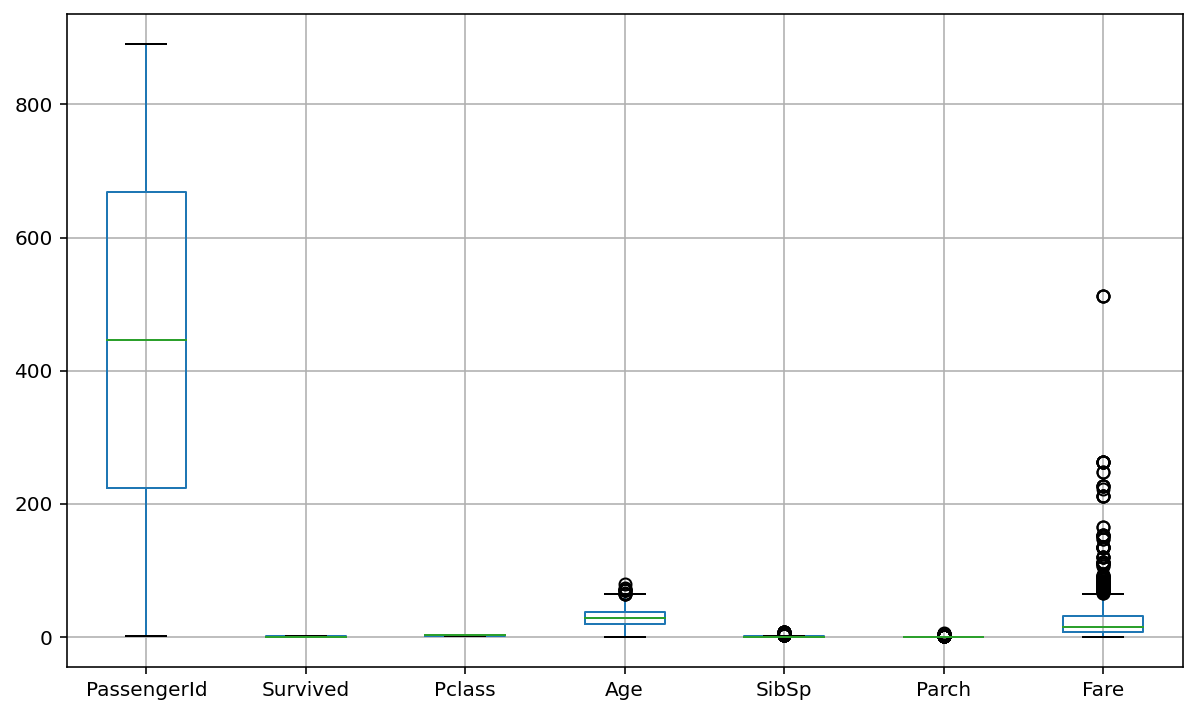

In [10]:
#박스 플롯으로 데이터의 전체적인 값의 범위를 파악 가능
plt.figure(figsize=(10,6))
df.boxplot()

In [11]:
#컬럼명 보기
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

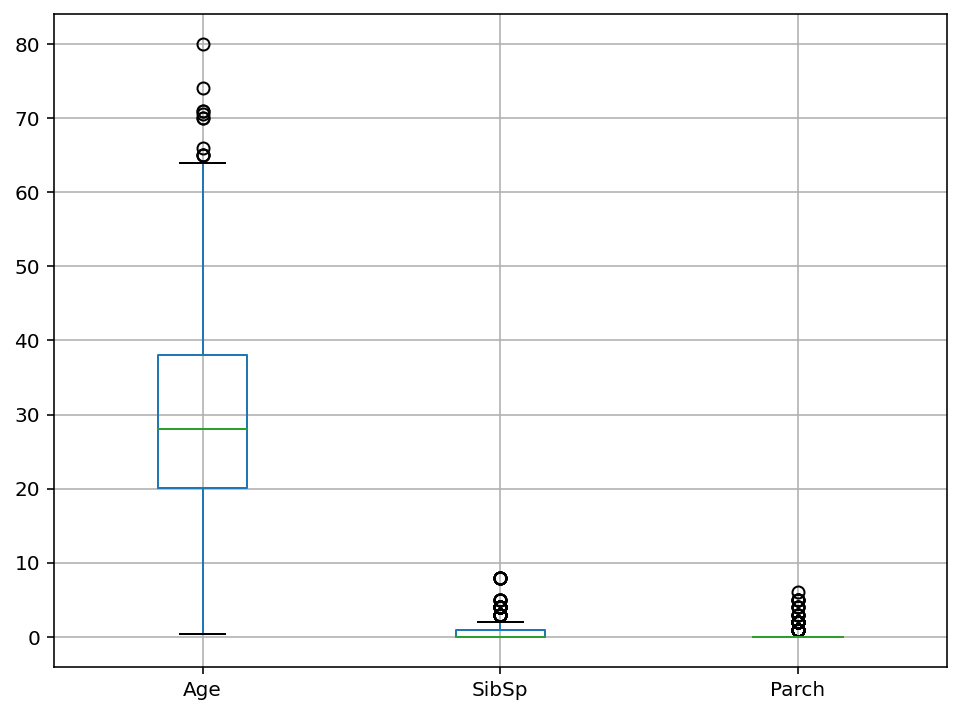

In [12]:
#특정 컬럼만 보기
plt.figure(figsize=(8,6))
df[['Age','SibSp','Parch']].boxplot()

<AxesSubplot:>

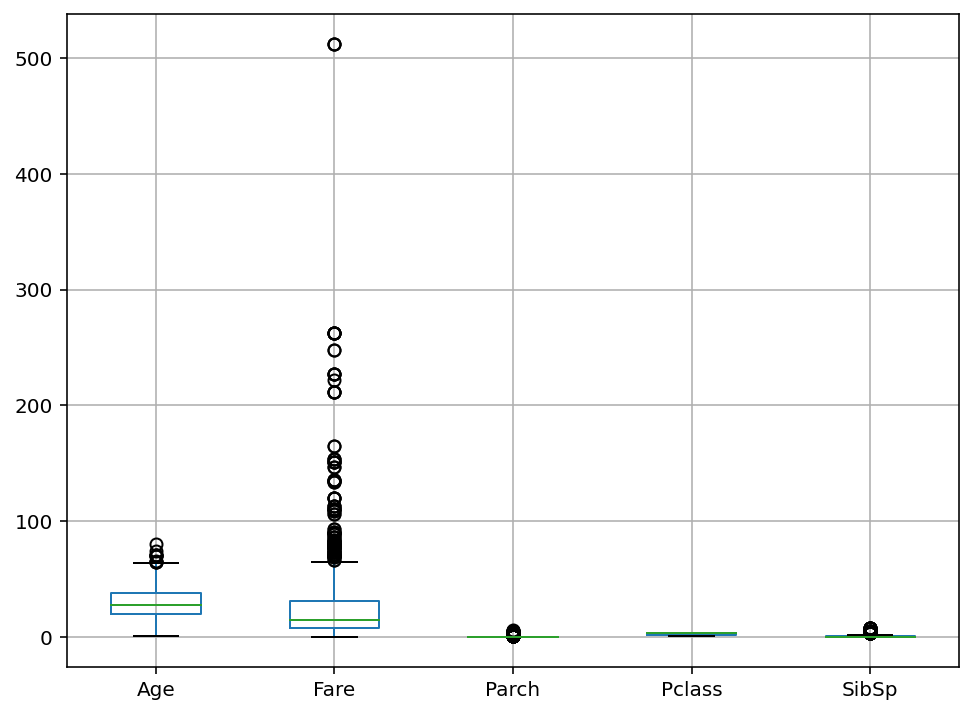

In [13]:
#특정 컬럼만 제외하고 보기
plt.figure(figsize=(8,6))
df[df.columns.difference(['PassengerId','Survived'])].boxplot()

In [14]:
#결측치 처리 +(특정 컬럼에 결측치가 너무 많으면 컬럼 자체를 사용하지 않음)

In [15]:
#컬럼별 결측치 갯수
#결측치가 있는 컬럼이 3개인 것을 알수 있다
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#항구 데이터는 결측치 2개 뿐이고, 다른 값으로 대체하기 어려워 샘플 삭제

In [17]:
df.shape

(891, 12)

In [19]:
df=df[~df["Embarked"].isnull()]
df.shape

(889, 12)

In [20]:
#컬럼 미사용(cabin 결측치 많아 컬럼 삭제)

In [22]:
#객실명 보기
print("Cabin 결측치수:",df.Cabin.isnull().sum())
print("Cabin 종류:",len(df.Cabin.value_counts()))
df.Cabin.value_counts()[:10]

Cabin 결측치수: 687
Cabin 종류: 146


G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
F33            3
C22 C26        3
F2             3
B18            2
E33            2
Name: Cabin, dtype: int64

In [25]:
##결측치 대체##

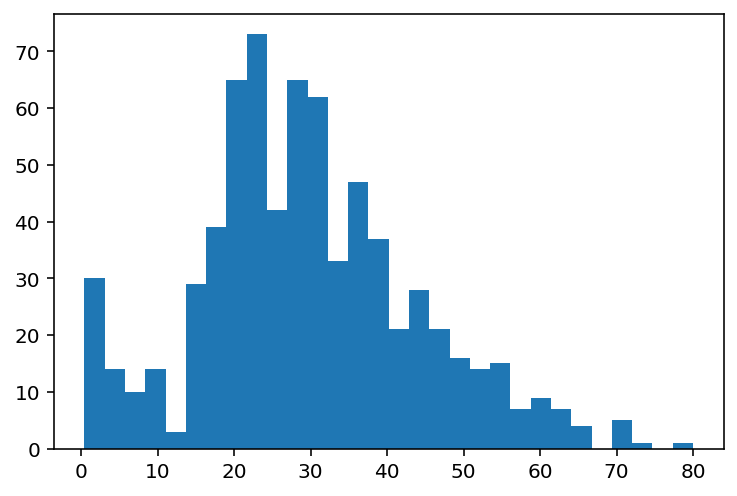

In [28]:
#나이 데이터 분포
plt.hist(df.Age, bins=30);plt.show()

In [29]:
#나이 평균
df.Age.mean()

29.64209269662921

In [31]:
#결측치를 평균 나이로 대체(대체한 것을 즉시 반영함)
df["Age"].fillna(df.Age.mean(),inplace=True)
df.Age.isnull().sum()

0

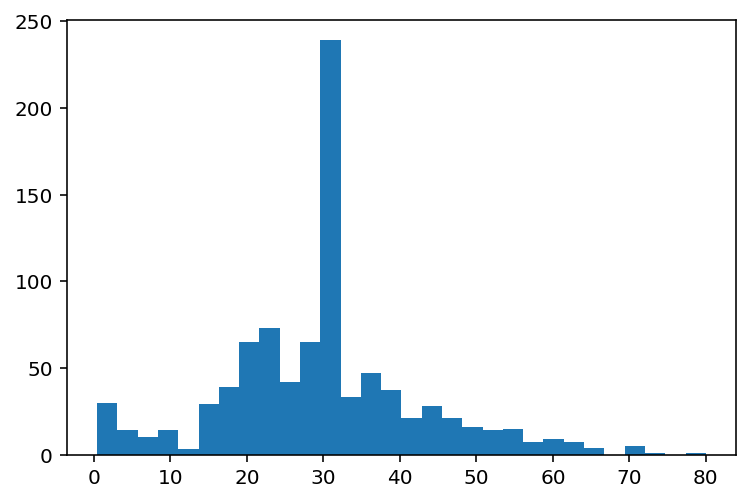

In [32]:
plt.hist(df.Age,bins=30);plt.show()

In [33]:
# 데이터 변환(카테고리 vs 연속형)-카테고리:1과 0, 연속형:로그변환, 역수변환

In [34]:
#카테고리 변수(선실 등급은 3가지 등급을 나타내는 카테고리 변수임)
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [35]:
#원핫 인코딩 결과를 별도의 데이터 프레임으로 만들어 둔다
df_class=pd.get_dummies(df["Pclass"],prefix="Class")
df_class.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [36]:
#성별의 구성
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [37]:
#원핫 인코딩 결과를 별도의 데이터 프레임으로 만들어 둔다.
df_sex=pd.get_dummies(df["Sex"],prefix="sex")
df_sex.head()

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [38]:
#항구명 (세가지 항구명도 카테고리 변수이며 원핫 인코딩으로 변환)
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df_embarked=pd.get_dummies(df["Embarked"],prefix="Embarked")
df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
#티켓명-안씀
df['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
347088      6
           ..
3411        1
370369      1
2629        1
237671      1
2695        1
Name: Ticket, Length: 680, dtype: int64

In [42]:
#티켓의 종류 수
df['Ticket'].nunique()

680

In [43]:
#티켓명 보기
df['Ticket'].unique()[:20]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649'], dtype=object)

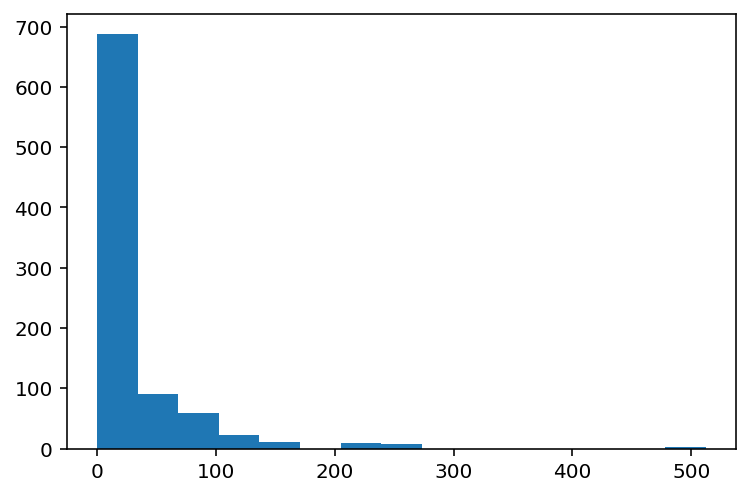

In [44]:
#아날로그 변수#
#요금#
plt.hist(df.Fare,bins=15);plt.show()

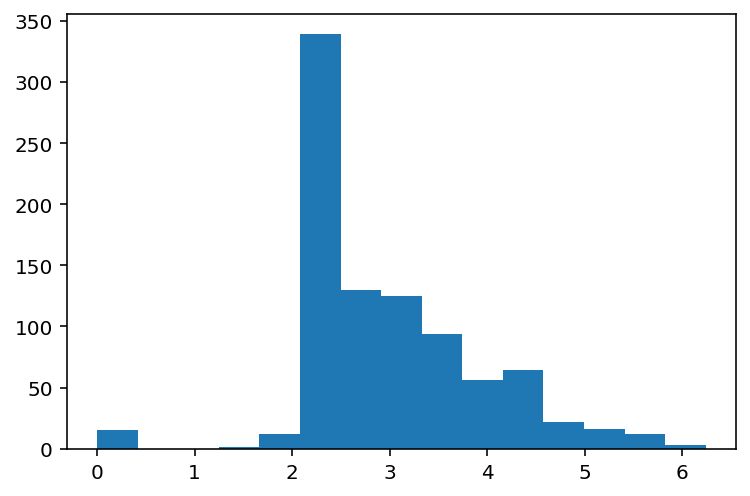

In [48]:
#돈과 관련된 값은 로그변환을 하여 선형적인 값으로 변환하는 경우가 많다
#로그를 취하면 정규 분포처럼 보인다(log-norma1 분포)
plt.hist(np.log(df.Fare+1),bins=15);plt.show()

In [49]:
#기타 변수
#형제, 동반자 수 종류
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
#부모, 자녀수 종류
df.Parch.value_counts()

0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [53]:
#사용할 아날로그 변수 컬럼들을 먼저 선택한다
x=df[['Age','SibSp','Parch','Fare']]
x[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [57]:
#요금은 로그 변환한 값을 사용한다(오류 발생을 피하기 위해서 작은 값을 더해준다)
x.Fare=np.log(x.Fare +0.1)
x[:3]

C:\ProgramData\Anaconda3-1\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare
0,22.0,1,0,1.994700
1,38.0,1,0,4.268064
2,26.0,0,0,2.082562


In [59]:
#원핫 인코딩한 카테고리 변수 칼럼들을 가로로 붙인다(axis=1)
x=pd.concat([x,df_embarked,df_class, df_sex],axis=1)
x[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male
0,22.0,1,0,1.994700,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,26.0,0,0,2.082562,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0


In [66]:
#스케일링 적용(스케일링을 해서 문제는 별로 없음, 스케일링을 안해서 문제가 커짐)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[['Age','SibSp','Parch','Fare']]=scaler.fit_transform(x[['Age','SibSp','Parch','Fare']])
x[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0


In [67]:
#선형 분류 예측
#이진 분류를 위한 결정경계
#모델 훈련 및 성능 측정
#목적 변수:Survived컬럼의 값(분류 예측 대상 데이터)

In [68]:
y=df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [69]:
#선형 분류 함수를 SGDClassifier를 사용
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()

In [72]:
#전체 데이터를 훈련데이터와 검증 데이터로 랜덤하게 나눈다( 디폴트 비율은 75,25%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=19)

In [74]:
x[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,sex_female,sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0


In [77]:
len(x_train),len(x_test)

(666, 223)

In [79]:
#모델을 학습시킨다(학습 데이터 사용)
model.fit(x_train,y_train)
#검증 데이터를 사용하여 모델의 성능을 본다=score함수는 정확도 (accuracy)를 알려준다
model.score(x_test,y_test)

0.7443946188340808

In [80]:
#선형 모델의 가중치를 본다
#각 특성이 얼마나 중요하게 반영되었는지를 나타낸다
model.coef_

array([[-1.00154207e+00, -2.21330921e-01, -9.27171619e-15,
         1.06332719e+00, -7.32439757e-01,  7.32439757e-01,
        -6.93212425e-16,  2.44146586e-01, -4.59253232e-15,
        -2.44146586e-01,  1.22073293e+00, -1.22073293e+00,
        -7.32439757e-01,  7.32439757e-01, -6.93212425e-16,
         2.44146586e-01, -4.59253232e-15, -2.44146586e-01,
         1.22073293e+00, -1.22073293e+00]])

In [82]:
#가춪치의 컬럼 이름을 확인하고 큰 값 순으로 정렬하여 보겠다
result=pd.DataFrame({'feature':x.columns,'weight':model.coef_[0].round(3)})
result.sort_values('weight',ascending=False,inplace=True)
result

,feature,weight
10,sex_female,1.221
18,sex_female,1.221
3,Fare,1.063
5,Embarked_Q,0.732
13,Embarked_Q,0.732
15,Class_1,0.244
7,Class_1,0.244
14,Embarked_S,-0.000
8,Class_2,-0.000
6,Embarked_S,-0.000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

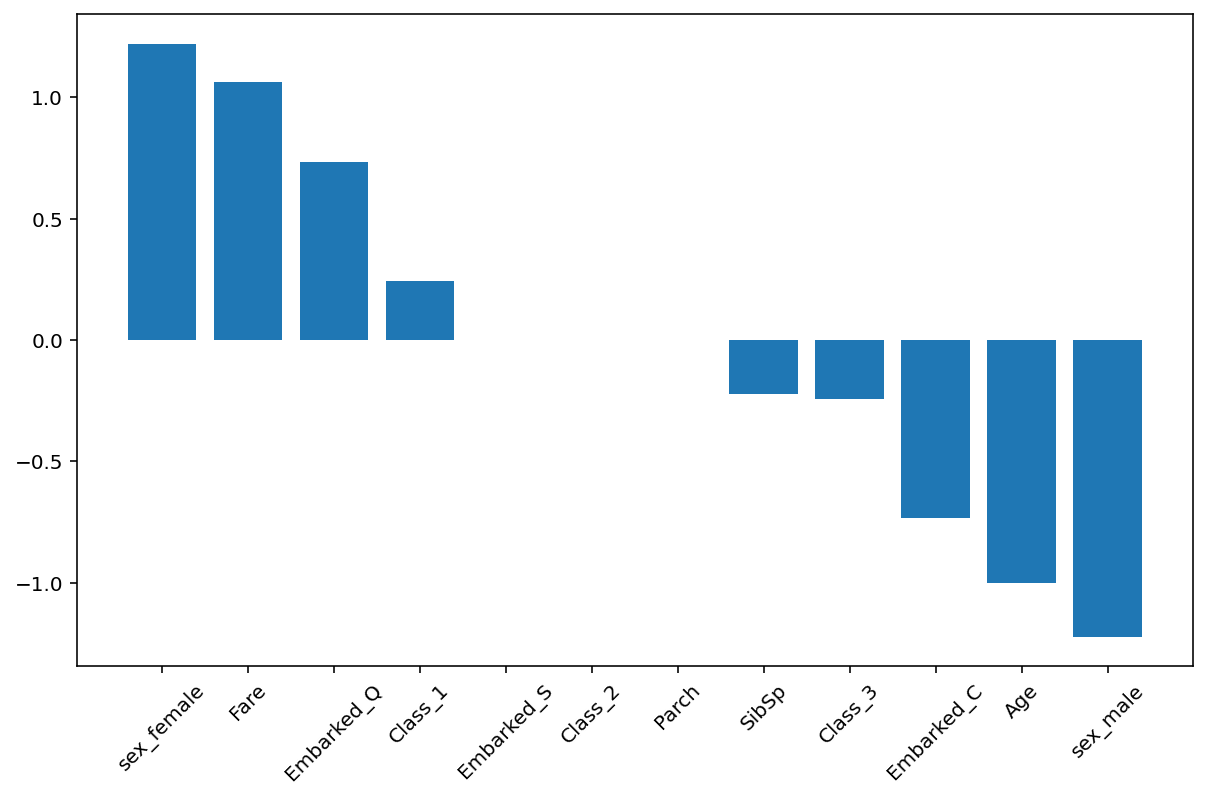

In [83]:
#가중치 값을 그래프로 보기
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)
#숫자가 클수록 살 확률이 커짐

In [84]:
# 생존하는데 가장 큰 변수는 성별, 등급석, 항구목록